# Tarea 2 Procesamiento de Voz  

In [ ]:
from google.colab import drive
from google.colab import files
from IPython.display import clear_output
from IPython.display import Audio
from IPython.display import display
import soundfile
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd
import datetime
import pywt
#from scipy import signal
from scipy.optimize import curve_fit

In [ ]:
#descomprimir .zip
drive.mount('/content/drive')
!unzip /content/drive/MyDrive/AudioWAV.zip
clear_output()

In [ ]:
import os

wavList = []

for filename in os.listdir('/content/AudioWAV/'):
  dir = '/content/AudioWAV/' + str(filename)
  wavList.append(dir)

In [ ]:
wav_audio0 = Audio(wavList[0])
display(wav_audio0)

In [ ]:
wav_audio0 = Audio(wavList[1])
display(wav_audio0)

In [ ]:
wav_audio0 = Audio(wavList[2])
display(wav_audio0)

In [ ]:
st1 = '/content/AudioWAV/1001_DFA_ANG_XX.wav'
wav_audio0 = Audio(st1)
display(wav_audio0)

In [ ]:
st2 = '/content/AudioWAV/1001_DFA_DIS_XX.wav'
wav_audio0 = Audio(st2)
display(wav_audio0)

In [ ]:
st3 = '/content/AudioWAV/1001_DFA_FEA_XX.wav'
wav_audio0 = Audio(st3)
display(wav_audio0)

In [ ]:
st4 = '/content/AudioWAV/1001_DFA_HAP_XX.wav'
wav_audio0 = Audio(st4)
display(wav_audio0)

In [ ]:
st5 = '/content/AudioWAV/1001_IEO_ANG_HI.wav'
wav_audio0 = Audio(st5)
display(wav_audio0)

In [ ]:
st6 = '/content/AudioWAV/1001_IEO_ANG_MD.wav'
wav_audio0 = Audio(st6)
display(wav_audio0)

In [ ]:
st7 = '/content/AudioWAV/1001_IEO_ANG_LO.wav'
wav_audio0 = Audio(st7)
display(wav_audio0)

In [ ]:
new_Xph = 

In [ ]:
def filter_signal(th):
    f_s = fft_filter(th)
    return np.real(np.fft.ifft(f_s))
def fft_filter(perc):
    fft_signal = np.fft.fft(signal)
    fft_abs = np.abs(fft_signal)
    th=perc*(2*fft_abs[0:int(len(signal)/2.)]/len(new_Xph)).max()
    fft_tof=fft_signal.copy()
    fft_tof_abs=np.abs(fft_tof)
    fft_tof_abs=2*fft_tof_abs/len(new_Xph)
    fft_tof[fft_tof_abs<=th]=0
    return fft_tof
def fft_filter_amp(th):
    fft = np.fft.fft(signal)
    fft_tof=fft.copy()
    fft_tof_abs=np.abs(fft_tof)
    fft_tof_abs=2*fft_tof_abs/len(new_Xph)
    fft_tof_abs[fft_tof_abs<=th]=0
    return fft_tof_abs[0:int(len(fft_tof_abs)/2.)]

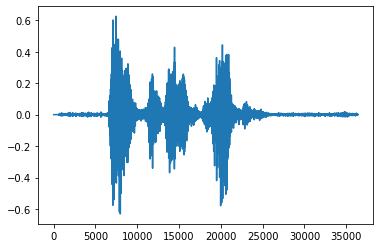

In [ ]:
signal1, sampling_rate1 = soundfile.read(st1)
n_samples1 = signal1.shape[0]
t1 = n_samples1/sampling_rate1
plt.plot(range(len(signal1)),signal1)

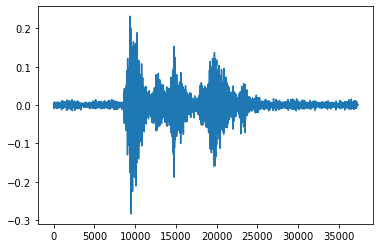

In [ ]:
signal2, sampling_rate2 = soundfile.read(st2)
n_samples2 = signal2.shape[0]
t2 = n_samples2/sampling_rate2
plt.plot(range(len(signal2)),signal2)

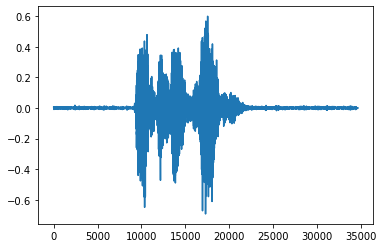

In [ ]:
signal3, sampling_rate3 = soundfile.read(st3)
n_samples3 = signal3.shape[0]
t3 = n_samples3/sampling_rate3
plt.plot(range(len(signal3)),signal3)

In [ ]:
sampling_rate3

16000

In [ ]:
s_L1 = len(signal1) # signal length in samples
n_w1 = 112 # number of windows
w_L1 = 320 # window length
n_coef1 = 12 # number of LPC coefficients
n_R1 = n_coef1 + 1 # number of elements of R(1 + coefficients)

In [ ]:
def windows(s):
  L = len(s)
  r = L%320
  t = int((L-r)/320)
  w = []
  w_L = 320
  if r != 0:
    t += 1
  for i in range(t):
    if i == t:
      w.append([])
      w[i] = s[w_L*i:]
    else:
      w.append([])
      w[i] = s[w_L*i:w_L*(i+1)]
  return(w)

In [ ]:
w1 = windows(signal1)

In [ ]:
len(w1)

114

In [ ]:
w1 = w1[1:len(w1)-1]

Text(0, 0.5, 'Amplitud')

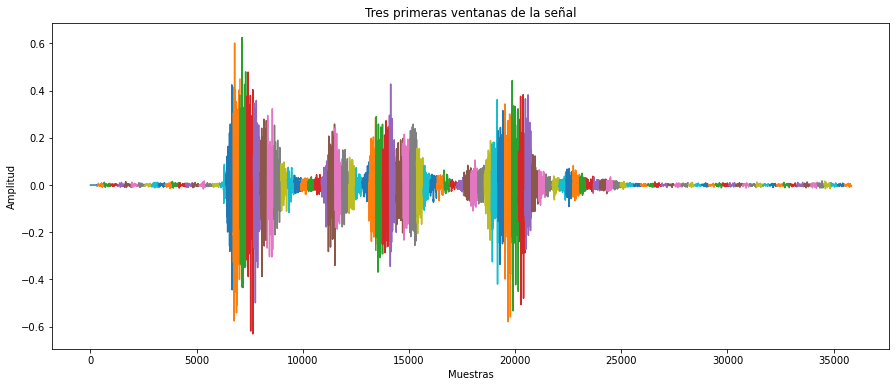

In [ ]:
plt.figure(figsize=(15, 6))
for i in range(len(w1)):
  plt.plot(range(320*i,320*(i+1)),w1[i])
plt.title('Tres primeras ventanas de la señal')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')

In [ ]:
def correlation_R(n_R,w):
  n_w = len(w)
  R = []
  for i in range(n_w):
    R.append([])
    for k in range(1,n_R+1):
      suma = 0
      if i == n_w-1:
        w_L = len(w[-1])
      else:
        w_L = w_L1
      for m in range(1,w_L+1-(k-1)):
        r = w[i][m-1]*w[i][m+k-2]
        suma = suma + r
      R[i].append(suma)
  R = np.array(R)
  return(R)

In [ ]:
R1 = correlation_R(n_R1,w1)

In [ ]:
R1[0]

array([ 7.81901181e-05,  7.05430284e-05,  6.39120117e-05,  5.42933121e-05,
        4.53284010e-05,  3.48072499e-05,  2.64877453e-05,  1.74427405e-05,
        1.35535374e-05,  7.03893602e-06,  2.79583037e-06, -8.92207026e-07,
       -1.54878944e-06])

In [ ]:
def toeplitz(n_w,n_coef,R):
  n_R = n_coef+1
  Rmatrix=[]
  for i in range(1,n_w+1):
    Rmatrix.append([])
    c1=[]
    for h in range(1,n_coef+1):
      c1.append(R[i-1][h-1])
    Rmatrix[i-1].append(c1)
    for e in range(2,n_R):
      cn = []
      for u in range(e-1):
        cn.append(c1[e-1-u])
      for j in range(e-1,n_coef):
        cn.append(c1[j-(e-1)])
      Rmatrix[i-1].append(cn)
  Rmatrix = np.array(Rmatrix)
  return(Rmatrix)

In [ ]:
RM1 = toeplitz(len(w1),n_coef1,R1)

In [ ]:
R1.shape

(112, 13)

In [ ]:
RM1.shape

(112, 12, 12)

In [ ]:
def LPC(n_w,R,Rmatrix):
  A=[];
  v1=0;
  for i in range(n_w-1):
    A.append([])
    a = -np.matmul(np.linalg.inv(Rmatrix[i]),np.array(R[i][1:]))
    a = np.insert(a, 0, 1)
    A[i] = a
  return(A)

In [ ]:
RM1[0]

array([[ 7.81901181e-05,  7.05430284e-05,  6.39120117e-05,
         5.42933121e-05,  4.53284010e-05,  3.48072499e-05,
         2.64877453e-05,  1.74427405e-05,  1.35535374e-05,
         7.03893602e-06,  2.79583037e-06, -8.92207026e-07],
       [ 7.05430284e-05,  7.81901181e-05,  7.05430284e-05,
         6.39120117e-05,  5.42933121e-05,  4.53284010e-05,
         3.48072499e-05,  2.64877453e-05,  1.74427405e-05,
         1.35535374e-05,  7.03893602e-06,  2.79583037e-06],
       [ 6.39120117e-05,  7.05430284e-05,  7.81901181e-05,
         7.05430284e-05,  6.39120117e-05,  5.42933121e-05,
         4.53284010e-05,  3.48072499e-05,  2.64877453e-05,
         1.74427405e-05,  1.35535374e-05,  7.03893602e-06],
       [ 5.42933121e-05,  6.39120117e-05,  7.05430284e-05,
         7.81901181e-05,  7.05430284e-05,  6.39120117e-05,
         5.42933121e-05,  4.53284010e-05,  3.48072499e-05,
         2.64877453e-05,  1.74427405e-05,  1.35535374e-05],
       [ 4.53284010e-05,  5.42933121e-05,  6.3912011

In [ ]:
A1 = LPC(n_w1,R1,RM1)

In [ ]:
def energy(n_w,n_coef,A,R):
  # Cálculo de energía
  E = []
  for i in range(1,n_w):
    E.append([])
    suma = 0
    for k in range(1,n_coef+1):
      suma = suma + A[i-1][k-1]*R[i-1][k-1]
    E[i-1] = R[i-1][0] - suma
  E = np.array(E)
  Emax = np.max(E)
  E = np.divide(E,Emax)
  return(E)

In [ ]:
E1 = energy(n_w1,n_coef1,A1,R1)

In [ ]:
def gain(E):
  # Cálculo de ganancia
  G = np.sqrt(E)
  return(G)

In [ ]:
G1 = gain(E1)

In [ ]:
def trim(G):
  i = 0
  while G[i] < 0.04:
    i += 1
  j = len(G)-1
  while G[j] < 0.04:
    j -= 1
  return(i,j)

In [ ]:
[i1,j1] = trim(G1)

In [ ]:
i1,j1

(19, 75)

Text(0, 0.5, 'Amplitud')

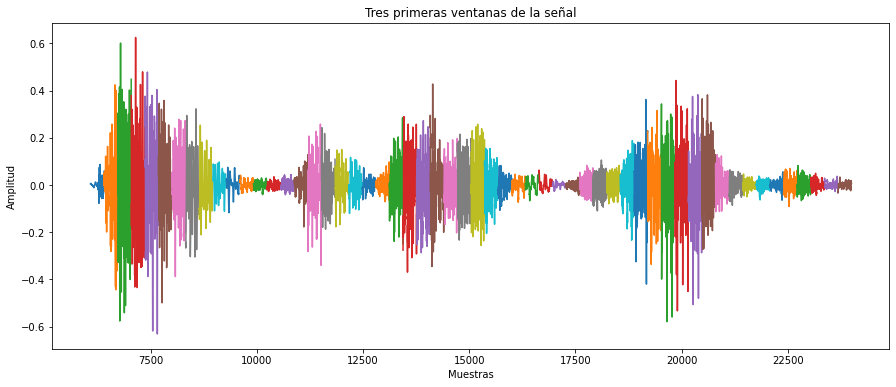

In [ ]:
plt.figure(figsize=(15, 6))
for i in range(i1,j1):
  plt.plot(range(320*i,320*(i+1)),w1[i])
plt.title('Tres primeras ventanas de la señal')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')

In [ ]:
i2

0

In [ ]:
G2[0]

0.05321418374710649

Text(0, 0.5, 'Amplitud')

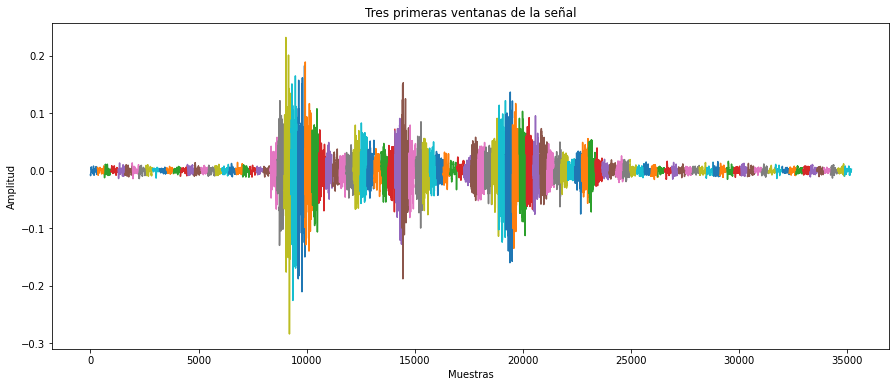

In [ ]:
w2 = windows(signal2)
w2 = w2[1:len(w2)-1]
R2 = correlation_R(n_R1,w2)
RM2 = toeplitz(len(w2),n_coef1,R2)
A2 = LPC(n_w1,R2,RM2)
E2 = energy(n_w1,n_coef1,A2,R2)
G2 = gain(E2)
[i2,j2] = trim(G2)
plt.figure(figsize=(15, 6))
for i in range(i2,j2):
  plt.plot(range(320*i,320*(i+1)),w2[i])
plt.title('Tres primeras ventanas de la señal')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')

In [ ]:
times1 = np.linspace(0, t1, num=n_samples1)
times2 = np.linspace(0, t2, num=n_samples2)
times3 = np.linspace(0, t3, num=n_samples3)

/usr/local/lib/python3.7/dist-packages/matplotlib/axes/_axes.py:7592: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


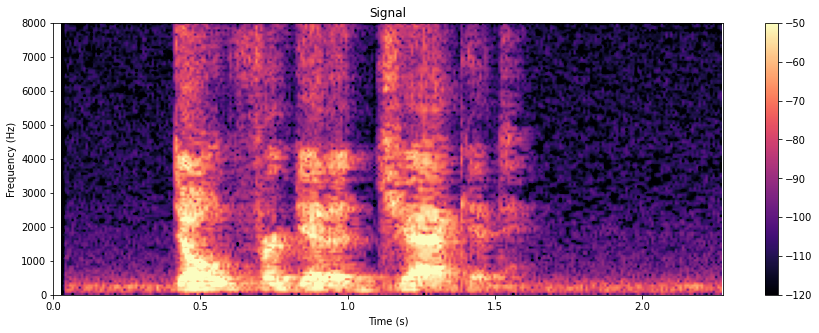

In [ ]:
plt.figure(figsize=(15, 5))
[specs,freq,time,im] = plt.specgram(signal1, Fs=sampling_rate1, vmin=-120, vmax=-50, cmap = 'magma')
plt.title('Signal')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (s)')
plt.xlim(0, t1)
plt.colorbar()
plt.show()

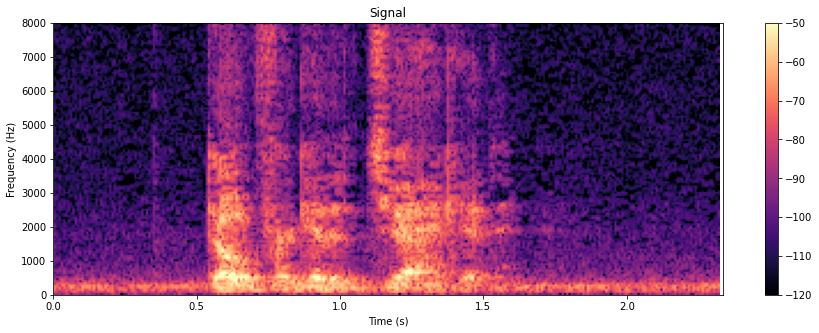

In [ ]:
plt.figure(figsize=(15, 5))
[specs,freq,time,im] = plt.specgram(signal2, Fs=sampling_rate2, vmin=-120, vmax=-50, cmap = 'magma')
plt.title('Signal')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (s)')
plt.xlim(0, t2)
plt.colorbar()
plt.show()

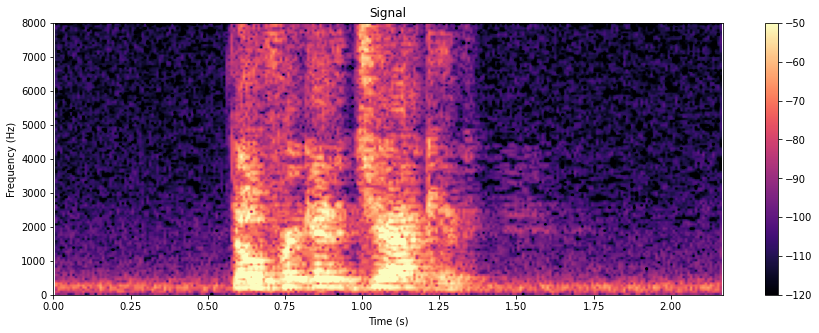

In [ ]:
plt.figure(figsize=(15, 5))
[specs,freq,time,im] = plt.specgram(signal3, Fs=sampling_rate3, vmin=-120, vmax=-50, cmap = 'magma')
plt.title('Signal')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (s)')
plt.xlim(0, t3)
plt.colorbar()
plt.show()

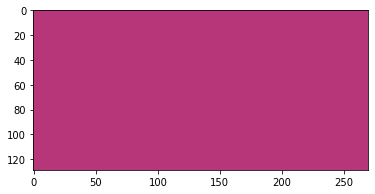

In [ ]:
plt.imshow(specs, vmin=-100, vmax=100, cmap = 'magma')

In [ ]:
plt.specs

AttributeError: ignored

In [ ]:
signal, sampling_rate = soundfile.read(wavList[1])
signal.shape

In [ ]:
signal, sampling_rate = soundfile.read(wavList[2])
signal.shape

In [ ]:
sampling_rate

In [ ]:
44845/16000